In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


In [2]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
# sns.set_context("talk")
sns.set_context("poster")

TRUE_EFFECT = 0.5


In [3]:
df_N300 = pd.read_csv("linear_dgp_noisy_network_N300.csv")
df_N300['type'] = df_N300['type'].replace('observed',"Obs.")
df_N300['type'] = df_N300['type'].replace('oracle',"Oracle")
df_N300['type'] = df_N300['type'].replace('plugin',"Plugin")
df_N300['type'] = df_N300['type'].replace('cut-2S',"Cut-2S")
df_N300['type'] = df_N300['type'].replace('cut-3S',"Cut-3S")
df_N300

,mean,median,std,q005,q025,q975,q995,min,max,type,iter
0,0.495564,0.495602,0.030106,0.420302,0.437499,0.554226,0.572207,0.363781,0.622929,Oracle,0
1,0.203294,0.203368,0.029827,0.126688,0.145011,0.261152,0.279012,0.081530,0.333341,Obs.,0
2,0.223034,0.223182,0.052184,0.086760,0.120133,0.324615,0.355869,-0.035377,0.479296,Cut-2S,0
3,0.226162,0.223084,0.065997,0.074932,0.106521,0.362305,0.406097,-0.018941,0.571187,Cut-3S,0
4,0.528034,0.527618,0.059028,0.375268,0.411538,0.643110,0.676362,0.309904,0.815184,Plugin,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,0.445752,0.445686,0.031724,0.365219,0.383611,0.506933,0.526999,0.316122,0.564859,Oracle,299
1496,0.184570,0.184520,0.026432,0.116742,0.132668,0.235629,0.250604,0.070363,0.284391,Obs.,299
1497,0.198789,0.198741,0.046404,0.078645,0.107910,0.289809,0.319275,-0.025151,0.423940,Cut-2S,299
1498,0.200777,0.197199,0.061922,0.061660,0.090291,0.328838,0.370183,-0.026491,0.525569,Cut-3S,299


In [4]:
df_N300["RMSE"] = np.square(df_N300["mean"]-TRUE_EFFECT) + np.square(df_N300["std"])
df_N300["true_included95"] = (df_N300["q025"] <= TRUE_EFFECT) & (df_N300["q975"] >= TRUE_EFFECT) 
df_N300["true_included99"] = (df_N300["q005"] <= TRUE_EFFECT) & (df_N300["q995"] >= TRUE_EFFECT) 
df_N300['bias'] = df_N300['mean'] - TRUE_EFFECT
df_N300["CI_length95"] = df_N300["q975"] - df_N300["q025"] 
df_N300["CI_length99"] = df_N300["q995"] - df_N300["q005"] 


In [14]:
def coverage_perc(x):
    return np.mean(x)*100


df_summary = df_N300.groupby("type").agg({'mean' : ['mean'],
                                         'median' : ['median'],
                                         'std' : ['mean'],
                                         'bias' : ['mean'],
                                         'RMSE' : ['mean'],
                                         'q025' : ['median'],
                                         'q975' : ['median'],
                                         'min' : ['median'],
                                         'max' : ['median'],
                                         'true_included95' : [coverage_perc],
                                         'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

df_summary


,mean,median,std,bias,RMSE,q025,q975,min,max,true_included95,true_included99
,mean,median,mean,mean,mean,median,median,median,median,coverage_perc,coverage_perc
type,,,,,,,,,,,
Cut-2S,0.242232,0.242094,0.045991,-0.257768,0.069585,0.153624,0.330232,0.019893,0.463938,0.000000,0.000000
Cut-3S,0.242534,0.239440,0.060131,-0.257466,0.070937,0.136931,0.365642,0.011508,0.553003,0.000000,2.000000
Obs.,0.224526,0.224176,0.029482,-0.275474,0.077659,0.167174,0.280968,0.110371,0.339188,0.000000,0.000000
Oracle,0.502837,0.504506,0.027725,0.002837,0.001603,0.450888,0.557387,0.394809,0.610011,95.333333,97.666667
Plugin,0.483684,0.476388,0.048444,-0.016316,0.005983,0.384461,0.568390,0.295177,0.662064,89.333333,96.666667


In [6]:
np.std(df_N300[df_N300['type'] =="Plugin"]['mean'])

0.05770411427400561

Text(0, 0.5, '')

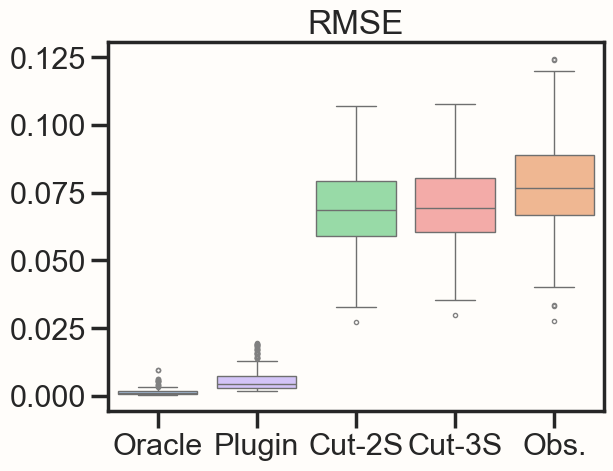

In [7]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=df_N300, x = 'type', y = 'RMSE',
               order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'],
                       hue = "type", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE")
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

Text(0.5, 1.0, 'bias distribution')

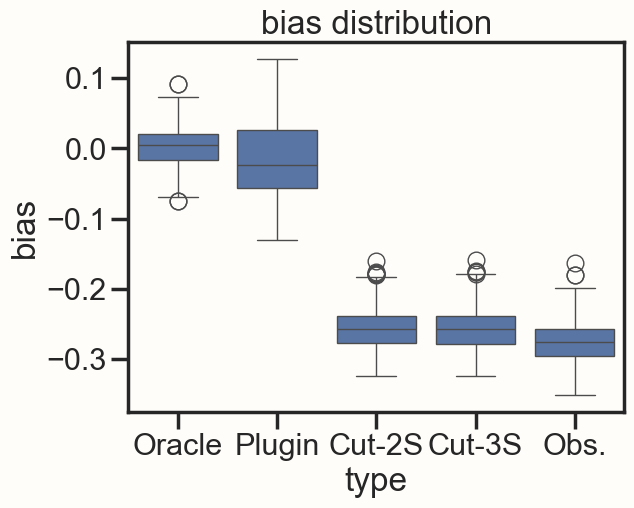

In [8]:
box_bias = sns.boxplot(data=df_N300, x = 'type', y = 'bias',
                order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])
box_bias.set_title("bias distribution")

Text(0.5, 1.0, 'Std distribution')

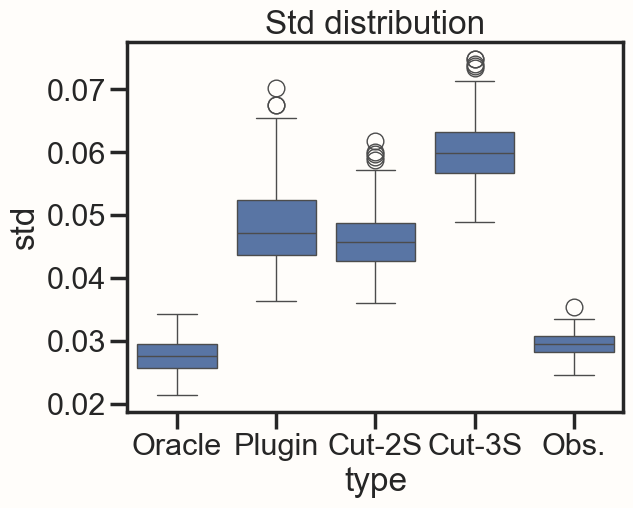

In [9]:
box_std = sns.boxplot(data=df_N300, x = 'type', y = 'std',
                order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])
box_std.set_title("Std distribution")

In [19]:
# c95_text = ['{:.2f}%'.format(num) for num in df_summary.reindex(['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])['true_included95','coverage_perc']]
# c95_text = [f"{p:.1f}%" for p in df_summary.reindex(['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])['true_included95','coverage_perc']]
c95_text = [f"{int(p)}%" for p in df_summary.reindex(['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])['true_included95','coverage_perc']]
# c95_text = [c95_text[i] for i in [3,4,0,1,2]]
print(c95_text)

c95_max = df_N300.groupby('type').agg({'CI_length95': ['max']}).reindex(['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])[('CI_length95', 'max')]
c95_max = [val for val in c95_max]
print(c95_max)

['95%', '89%', '0%', '0%', '0%']
[0.13525835424661642, 0.2776461325585842, 0.2424978442490101, 0.2910009063780308, 0.13876427970826619]


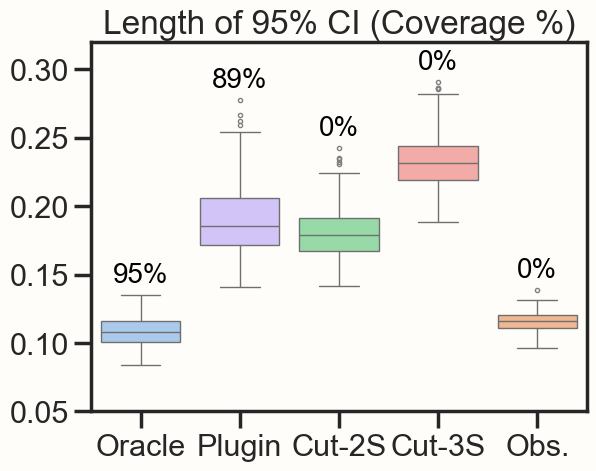

In [20]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='gray')

box_ci95 = sns.boxplot(data=df_N300, x = 'type', y = 'CI_length95',
                order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'],
                      hue = 'type', palette='pastel',
                       flierprops=flierprops)
box_ci95.set_title("Length of 95% CI (Coverage %)")
box_ci95.set_xlabel("")
box_ci95.set_ylabel("")
box_ci95.set_ylim(0.05,0.32)

pos = range(len(c95_max))
for tick,label in zip(pos,box_ci95.get_xticklabels()):
    box_ci95.text(pos[tick],
            c95_max[tick] + 0.009,
            c95_text[tick],
            horizontalalignment='center',
            size='small',
            color='black')
            # weight='semibold')
 


Text(0.5, 1.0, 'Length of 99% CI distribution')

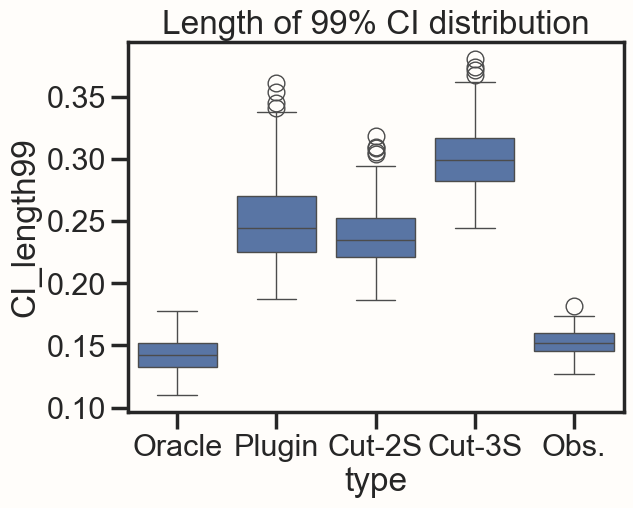

In [12]:
box_ci99 = sns.boxplot(data=df_N300, x = 'type', y = 'CI_length99',
                order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'])
box_ci99.set_title("Length of 99% CI distribution")

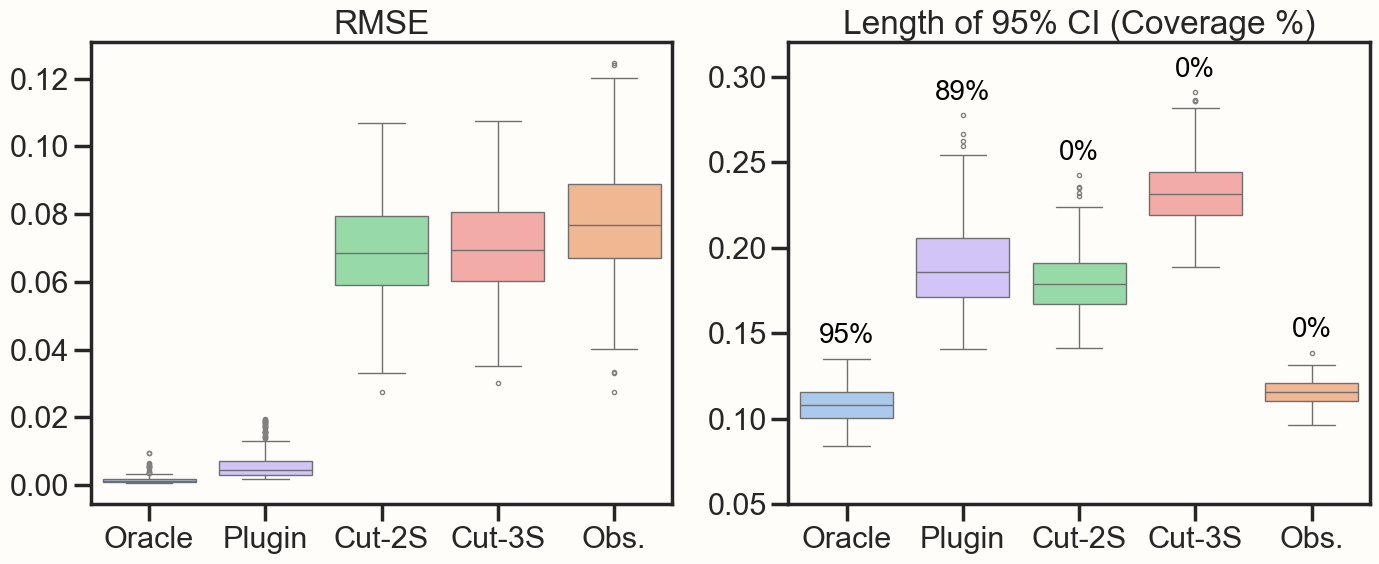

In [21]:
fig, axes = plt.subplots(1, 2)

flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='gray')

box_rmse = sns.boxplot(data=df_N300, x = 'type', y = 'RMSE',
               order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'],
                       hue = "type", palette = 'pastel',
                       flierprops=flierprops,
                       ax=axes[0])
box_rmse.set_title("RMSE")
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

box_ci95 = sns.boxplot(data=df_N300, x = 'type', y = 'CI_length95',
                order = ['Oracle', 'Plugin','Cut-2S','Cut-3S','Obs.'],
                      hue = 'type', palette='pastel',
                       flierprops=flierprops,
                       ax=axes[1])
box_ci95.set_title("Length of 95% CI (Coverage %)")
box_ci95.set_xlabel("")
box_ci95.set_ylabel("")
box_ci95.set_ylim(0.05,0.32)

pos = range(len(c95_max))
for tick,label in zip(pos,box_ci95.get_xticklabels()):
    box_ci95.text(pos[tick],
            c95_max[tick] + 0.009,
            c95_text[tick],
            horizontalalignment='center',
            size='small',
            color='black')
            # weight='semibold')
 
fig = plt.gcf()
fig.set_size_inches(16.5, 6)
fig.savefig('Sim_RMSE_CI_plot.png', dpi=300)
 